In [178]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import fcluster
from sklearn.manifold import TSNE

# Clustering

## Colonnes oranges

In [179]:
df = pd.read_csv("fic_epita_kantar_codes.csv", sep=";")

In [180]:
orange = [
    "A9_1_slice", "A9_2_slice", "A9_3_slice", "A9_4_slice", "A9_5_slice", 
    "A9_6_slice", "A9_7_slice", "A9_8_slice", "A9_9_slice", "A9_10_slice", 
    "A9_11_slice", "A9_12_slice", "A9_13_slice", "A9_14_slice", "A9_15_slice", 
    "A9_16_slice", "A10_1_slice", "A10_2_slice", "A10_3_slice", "A10_4_slice", 
    "A10_5_slice", "A10_6_slice", "A10_7_slice", "A10_8_slice", "A11_1_slice", 
    "A11_2_slice", "A11_3_slice", "A11_4_slice", "A11_5_slice", "A11_6_slice", 
    "A11_7_slice", "A11_8_slice", "A11_9_slice", "A11_10_slice", "A11_11_slice", 
    "A11_12_slice", "A11_13_slice"
]

df_attitude = df[orange]


In [181]:
df_attitude

,A9_1_slice,A9_2_slice,A9_3_slice,A9_4_slice,A9_5_slice,A9_6_slice,A9_7_slice,A9_8_slice,A9_9_slice,A9_10_slice,...,A11_4_slice,A11_5_slice,A11_6_slice,A11_7_slice,A11_8_slice,A11_9_slice,A11_10_slice,A11_11_slice,A11_12_slice,A11_13_slice
0,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
1,1,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2
2,3,2,2,2,3,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
3,1,2,2,2,3,2,3,2,1,2,...,2,1,2,3,3,3,2,2,1,2
4,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3,2,3,4,3,2,2,2,1,2,...,2,1,2,1,1,1,1,1,1,1
4996,2,3,4,3,3,2,4,2,3,2,...,2,2,3,2,2,2,2,3,2,4
4997,3,4,4,3,2,2,4,4,3,3,...,3,2,3,3,3,2,3,3,2,3
4998,3,3,4,3,3,2,3,3,2,2,...,3,3,2,3,2,3,2,2,1,3


### KMeans clustering

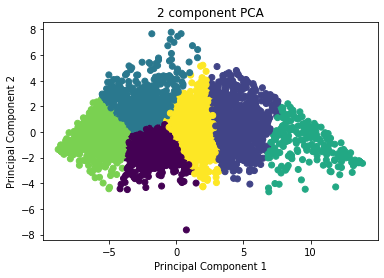

In [182]:
# Standardiser la donnée
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_attitude)

# Appliquer le PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_scaled)

# Convertir en dataframe
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# Appliquer le KMeans clustering
kmeans = KMeans(n_clusters=6, random_state=0, n_init="auto")
kmeans.fit(principalDf)

# Ajouter les labels au dataframe
principalDf['Cluster'] = kmeans.labels_

# Afficher les clusters
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], c=principalDf['Cluster'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2 component PCA')
plt.show()


In [183]:
# Calculer les centres de chaque cluster
centroids = kmeans.cluster_centers_

# Calculer la variance intra-groupe pour chaque cluster
for i in range(6):
    cluster_points = principalDf[principalDf['Cluster'] == i][['principal component 1', 'principal component 2']]
    intra_cluster_variance = cdist(cluster_points, [centroids[i]], 'euclidean').std()
    print(f"Variance intra-groupe pour le cluster {i+1}: {intra_cluster_variance}")

# Calculer la variance inter-groupe
inter_cluster_variance = cdist(centroids, centroids, 'euclidean').std()
print(f"Variance inter-groupe : {inter_cluster_variance}")

Variance intra-groupe pour le cluster 1: 0.6452536108409659
Variance intra-groupe pour le cluster 2: 0.8711214998263773
Variance intra-groupe pour le cluster 3: 0.9138471512729727
Variance intra-groupe pour le cluster 4: 1.038052263369652
Variance intra-groupe pour le cluster 5: 0.7117490656003871
Variance intra-groupe pour le cluster 6: 0.7448781807397619
Variance inter-groupe : 4.306536904246425


### Dendrogram clustering

In [184]:
# Standardiser les données
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_attitude)

# Générer la matrice de liens
Z = linkage(df_scaled, 'ward')

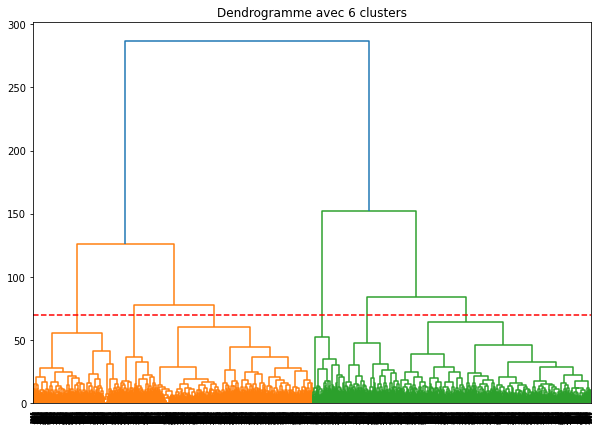

In [185]:
# Détermination des clusters à partir de la matrice de liens Z
clusters = fcluster(Z, 6, criterion='maxclust')

# Ajout des clusters au DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=df_attitude.columns)
df_scaled['cluster'] = clusters

# Affichage du dendrogramme avec une ligne horizontale pour les 6 clusters
plt.figure(figsize=(10, 7))
plt.title("Dendrogramme avec 6 clusters")
dendrogram(Z)
plt.axhline(y=70, color='r', linestyle='--')
plt.show()

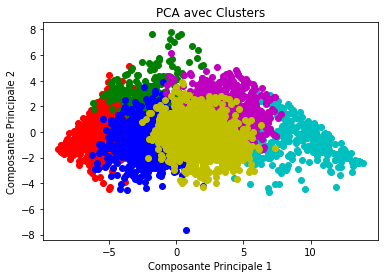

In [186]:
# Effectuer une PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_scaled.drop('cluster', axis=1))

# Créer un DataFrame avec les composantes principales
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# Ajouter les clusters au DataFrame
finalDf = pd.concat([principalDf, df_scaled[['cluster']]], axis = 1)

# Créer une liste de couleurs pour chaque cluster
colors = ['r', 'g', 'b', 'c', 'm', 'y']

# Afficher chaque cluster
for cluster in np.unique(clusters):
    plt.scatter(finalDf.loc[finalDf['cluster'] == cluster, 'principal component 1'], 
                finalDf.loc[finalDf['cluster'] == cluster, 'principal component 2'], 
                c = colors[cluster-1])
plt.title('PCA avec Clusters')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.show()

In [187]:
# Effectuer un clustering KMeans sur les composantes principales
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(principalDf)

# Ajouter les labels de cluster au DataFrame des composantes principales
principalDf['Cluster'] = kmeans.labels_

# Calculer les centres de chaque cluster
centroids = kmeans.cluster_centers_

# Calculer la variance intra-groupe pour chaque cluster
for i in range(6):
    cluster_points = principalDf[principalDf['Cluster'] == i][['principal component 1', 'principal component 2']]
    intra_cluster_variance = cdist(cluster_points, [centroids[i]], 'euclidean').std()
    print(f"Variance intra-groupe pour le cluster {i+1}: {intra_cluster_variance}")

# Calculer la variance inter-groupe
inter_cluster_variance = cdist(centroids, centroids, 'euclidean').std()
print(f"Variance inter-groupe : {inter_cluster_variance}")

e:\Program Files (x86)\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Variance intra-groupe pour le cluster 1: 0.860892765962681
Variance intra-groupe pour le cluster 2: 0.8845579960407182
Variance intra-groupe pour le cluster 3: 0.7253903590615347
Variance intra-groupe pour le cluster 4: 0.7777789392113447
Variance intra-groupe pour le cluster 5: 1.0174571828624852
Variance intra-groupe pour le cluster 6: 0.7019445121097743
Variance inter-groupe : 4.401876605024499


### TSNE Clustering

e:\Program Files (x86)\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


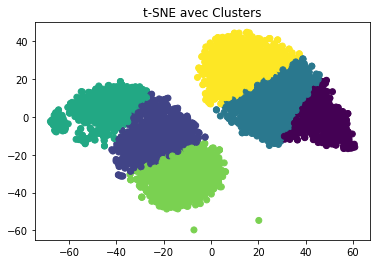

In [188]:
# Effectuer une t-SNE
tsne = TSNE(n_components=2, random_state=0)
tsne_obj= tsne.fit_transform(df_scaled)

# Convertir en DataFrame
tsne_df = pd.DataFrame({'X':tsne_obj[:,0],
                        'Y':tsne_obj[:,1]})

# Effectuer un clustering KMeans
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(tsne_df)

# Ajouter les labels au DataFrame
tsne_df['Cluster'] = kmeans.labels_

# Afficher les clusters
plt.scatter(tsne_df['X'], tsne_df['Y'], c=tsne_df['Cluster'])
plt.title('t-SNE avec Clusters')
plt.show()

In [189]:
# Calculer les centres de chaque cluster
centroids = kmeans.cluster_centers_

# Calculer la variance intra-groupe pour chaque cluster
for i in range(6):
    cluster_points = tsne_df[tsne_df['Cluster'] == i][['X', 'Y']]
    intra_cluster_variance = cdist(cluster_points, [centroids[i]], 'euclidean').std()
    print(f"Variance intra-groupe pour le cluster {i+1}: {intra_cluster_variance}")

# Calculer la variance inter-groupe
inter_cluster_variance = cdist(centroids, centroids, 'euclidean').std()
print(f"Variance inter-groupe : {inter_cluster_variance}")

Variance intra-groupe pour le cluster 1: 4.4928882367537595
Variance intra-groupe pour le cluster 2: 4.760056146693664
Variance intra-groupe pour le cluster 3: 5.345093665155894
Variance intra-groupe pour le cluster 4: 5.282649129903465
Variance intra-groupe pour le cluster 5: 4.535721825985197
Variance intra-groupe pour le cluster 6: 4.931512912238625
Variance inter-groupe : 27.034244932009997


### Profilage des groupes
On choisit le clustering TSNE qui affiche un meilleur ratio.

In [190]:
orange_clusters = tsne_df.copy()
kmeans_orange = kmeans

In [191]:
# Ajouter les labels de cluster au DataFrame original
df_attitude['Cluster'] = kmeans.labels_
cluster = 0
# Calculer la distribution des catégories pour chaque cluster
print(f"Caractéristiques phares pour le cluster {cluster+1}:")
cluster_data = df_attitude[df_attitude['Cluster'] == cluster].drop('Cluster', axis=1)
for column in cluster_data.columns:
    most_common_value = cluster_data[column].value_counts().idxmax()
    if (cluster_data[column] == most_common_value).mean() > 0.5:
        print(f"{column}: {most_common_value}")

Caractéristiques phares pour le cluster 1:
A9_2_slice: 4
A9_3_slice: 4
A9_4_slice: 4
A9_7_slice: 4
A9_8_slice: 4
A9_12_slice: 4
A9_13_slice: 4
A9_16_slice: 4
A10_1_slice: 2
A10_2_slice: 2
A10_5_slice: 2
A11_5_slice: 3
A11_7_slice: 3
A11_8_slice: 3
A11_9_slice: 3


C:\Users\antho\AppData\Local\Temp/ipykernel_29928/3683863776.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_attitude['Cluster'] = kmeans.labels_


In [192]:
# Ajouter les labels de cluster au DataFrame original
df_attitude['Cluster'] = kmeans.labels_
cluster = 1
# Calculer la distribution des catégories pour chaque cluster
print(f"Caractéristiques phares pour le cluster {cluster+1}:")
cluster_data = df_attitude[df_attitude['Cluster'] == cluster].drop('Cluster', axis=1)
for column in cluster_data.columns:
    most_common_value = cluster_data[column].value_counts().idxmax()
    if (cluster_data[column] == most_common_value).mean() > 0.5:
        print(f"{column}: {most_common_value}")

Caractéristiques phares pour le cluster 2:
A9_1_slice: 2
A9_6_slice: 2
A9_8_slice: 2
A9_9_slice: 2
A9_10_slice: 2
A9_11_slice: 1
A9_12_slice: 3
A9_14_slice: 2
A9_15_slice: 2
A10_1_slice: 1
A10_4_slice: 2
A10_5_slice: 1
A10_6_slice: 3
A10_7_slice: 2
A11_2_slice: 2
A11_3_slice: 1
A11_5_slice: 1
A11_6_slice: 1
A11_7_slice: 1
A11_8_slice: 2
A11_9_slice: 2
A11_10_slice: 1
A11_11_slice: 2


C:\Users\antho\AppData\Local\Temp/ipykernel_29928/166247788.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_attitude['Cluster'] = kmeans.labels_


In [193]:
# Ajouter les labels de cluster au DataFrame original
df_attitude['Cluster'] = kmeans.labels_
cluster = 2
# Calculer la distribution des catégories pour chaque cluster
print(f"Caractéristiques phares pour le cluster {cluster+1}:")
cluster_data = df_attitude[df_attitude['Cluster'] == cluster].drop('Cluster', axis=1)
for column in cluster_data.columns:
    most_common_value = cluster_data[column].value_counts().idxmax()
    if (cluster_data[column] == most_common_value).mean() > 0.5:
        print(f"{column}: {most_common_value}")

Caractéristiques phares pour le cluster 3:
A9_2_slice: 3
A9_3_slice: 3
A9_4_slice: 3
A9_6_slice: 2
A9_8_slice: 3
A9_10_slice: 3
A9_11_slice: 2
A9_12_slice: 3
A9_13_slice: 4
A9_14_slice: 2
A10_1_slice: 2
A10_2_slice: 2
A10_4_slice: 2
A10_5_slice: 2
A11_1_slice: 2
A11_2_slice: 2
A11_3_slice: 2
A11_4_slice: 2
A11_5_slice: 2
A11_6_slice: 2
A11_7_slice: 2
A11_9_slice: 3
A11_10_slice: 2
A11_11_slice: 3
A11_12_slice: 2


C:\Users\antho\AppData\Local\Temp/ipykernel_29928/3389524942.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_attitude['Cluster'] = kmeans.labels_


In [194]:
# Ajouter les labels de cluster au DataFrame original
df_attitude['Cluster'] = kmeans.labels_
cluster = 3
# Calculer la distribution des catégories pour chaque cluster
print(f"Caractéristiques phares pour le cluster {cluster+1}:")
cluster_data = df_attitude[df_attitude['Cluster'] == cluster].drop('Cluster', axis=1)
for column in cluster_data.columns:
    most_common_value = cluster_data[column].value_counts().idxmax()
    if (cluster_data[column] == most_common_value).mean() > 0.5:
        print(f"{column}: {most_common_value}")

Caractéristiques phares pour le cluster 4:
A9_1_slice: 1
A9_7_slice: 1
A9_9_slice: 1
A9_10_slice: 2
A9_11_slice: 1
A9_14_slice: 1
A10_1_slice: 1
A10_2_slice: 1
A10_4_slice: 1
A10_5_slice: 1
A10_7_slice: 1
A10_8_slice: 1
A11_1_slice: 1
A11_2_slice: 1
A11_3_slice: 1
A11_4_slice: 1
A11_5_slice: 1
A11_6_slice: 1
A11_7_slice: 1
A11_8_slice: 1
A11_9_slice: 1
A11_10_slice: 1
A11_11_slice: 1
A11_12_slice: 1
A11_13_slice: 1


C:\Users\antho\AppData\Local\Temp/ipykernel_29928/2751104934.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_attitude['Cluster'] = kmeans.labels_


In [195]:
# Ajouter les labels de cluster au DataFrame original
df_attitude['Cluster'] = kmeans.labels_
cluster = 4
# Calculer la distribution des catégories pour chaque cluster
print(f"Caractéristiques phares pour le cluster {cluster+1}:")
cluster_data = df_attitude[df_attitude['Cluster'] == cluster].drop('Cluster', axis=1)
for column in cluster_data.columns:
    most_common_value = cluster_data[column].value_counts().idxmax()
    if (cluster_data[column] == most_common_value).mean() > 0.5:
        print(f"{column}: {most_common_value}")

Caractéristiques phares pour le cluster 5:
A9_1_slice: 2
A9_2_slice: 2
A9_3_slice: 2
A9_4_slice: 2
A9_6_slice: 2
A9_8_slice: 2
A9_9_slice: 2
A9_10_slice: 2
A9_11_slice: 2
A9_13_slice: 2
A9_14_slice: 2
A9_15_slice: 2
A9_16_slice: 2
A10_1_slice: 2
A10_2_slice: 2
A10_3_slice: 2
A10_4_slice: 2
A10_5_slice: 2
A10_6_slice: 3
A10_7_slice: 2
A10_8_slice: 2
A11_1_slice: 2
A11_2_slice: 2
A11_3_slice: 2
A11_4_slice: 2
A11_5_slice: 2
A11_6_slice: 2
A11_7_slice: 2
A11_8_slice: 2
A11_9_slice: 2
A11_10_slice: 2
A11_11_slice: 2
A11_12_slice: 2
A11_13_slice: 2


C:\Users\antho\AppData\Local\Temp/ipykernel_29928/1722673319.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_attitude['Cluster'] = kmeans.labels_


In [196]:
# Ajouter les labels de cluster au DataFrame original
df_attitude['Cluster'] = kmeans.labels_
cluster = 5
# Calculer la distribution des catégories pour chaque cluster
print(f"Caractéristiques phares pour le cluster {cluster+1}:")
cluster_data = df_attitude[df_attitude['Cluster'] == cluster].drop('Cluster', axis=1)
for column in cluster_data.columns:
    most_common_value = cluster_data[column].value_counts().idxmax()
    if (cluster_data[column] == most_common_value).mean() > 0.5:
        print(f"{column}: {most_common_value}")

Caractéristiques phares pour le cluster 6:
A9_1_slice: 2
A9_2_slice: 3
A9_3_slice: 3
A9_4_slice: 3
A9_5_slice: 3
A9_6_slice: 2
A9_9_slice: 2
A9_10_slice: 2
A9_11_slice: 2
A9_12_slice: 3
A9_14_slice: 2
A9_15_slice: 2
A10_1_slice: 2
A10_2_slice: 2
A10_4_slice: 2
A10_5_slice: 2
A10_6_slice: 3
A10_7_slice: 2
A11_1_slice: 2
A11_2_slice: 2
A11_3_slice: 2
A11_4_slice: 2
A11_5_slice: 2
A11_6_slice: 2
A11_7_slice: 2
A11_8_slice: 2
A11_9_slice: 2
A11_10_slice: 2
A11_11_slice: 2
A11_12_slice: 2
A11_13_slice: 2


C:\Users\antho\AppData\Local\Temp/ipykernel_29928/2869135573.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_attitude['Cluster'] = kmeans.labels_


## Colonnes vertes

In [197]:
vert = [
    "A11", "A12", "A13", "A14", "A4", "A5", "A5bis", "A8_1_slice", "A8_2_slice", 
    "A8_3_slice", "A8_4_slice", "B1_1_slice", "B1_2_slice", "B2_1_slice", "B2_2_slice", 
    "B3", "B4", "B6", "C1_1_slice", "C1_2_slice", "C1_3_slice", "C1_4_slice", "C1_5_slice", 
    "C1_6_slice", "C1_7_slice", "C1_8_slice", "C1_9_slice"
]

df_habitude = df[vert]
df_habitude

,A11,A12,A13,A14,A4,A5,A5bis,A8_1_slice,A8_2_slice,A8_3_slice,...,B6,C1_1_slice,C1_2_slice,C1_3_slice,C1_4_slice,C1_5_slice,C1_6_slice,C1_7_slice,C1_8_slice,C1_9_slice
0,1,0,0,0,1,2.0,NaN,2,2,2,...,3,2,2,2,2,2,2,2,2,2
1,1,0,0,0,1,5.0,NaN,2,0,0,...,3,4,4,4,4,4,4,4,4,4
2,1,0,0,0,1,2.0,NaN,5,5,1,...,4,4,4,4,4,4,4,4,4,4
3,1,1,1,0,1,1.0,NaN,2,3,2,...,4,4,4,5,5,5,5,5,4,4
4,0,1,0,0,2,NaN,1.0,1,1,1,...,3,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,0,1,0,3,NaN,1.0,5,6,5,...,4,4,4,5,5,5,5,5,4,5
4996,0,1,0,0,2,NaN,1.0,1,3,1,...,2,4,5,5,5,5,5,5,5,5
4997,0,1,0,0,2,NaN,2.0,1,1,1,...,4,5,5,5,5,5,5,5,5,5
4998,0,0,1,0,3,NaN,1.0,1,1,0,...,3,5,4,5,5,5,5,5,5,5


In [198]:
df_habitude = df_habitude.fillna(0)

scaler = StandardScaler()
df_habitude_scaled = scaler.fit_transform(df_habitude)
df_habitude_scaled = pd.DataFrame(df_habitude_scaled, columns=df_habitude.columns)

### TSNE Clustering

e:\Program Files (x86)\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


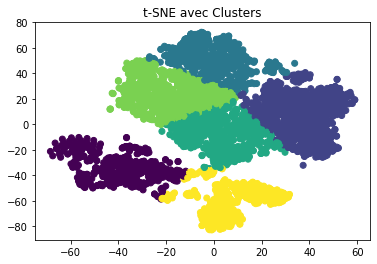

Variance intra-groupe pour le cluster 1: 6.753482928794227
Variance intra-groupe pour le cluster 2: 7.446867728233212
Variance intra-groupe pour le cluster 3: 6.365454355094967
Variance intra-groupe pour le cluster 4: 5.300641472921522
Variance intra-groupe pour le cluster 5: 6.118917994678167
Variance intra-groupe pour le cluster 6: 6.421485367040931
Variance inter-groupe : 31.348335010526498


In [199]:
# Effectuer une t-SNE
tsne = TSNE(n_components=2, random_state=0)
tsne_obj= tsne.fit_transform(df_habitude_scaled)

# Convertir en DataFrame
tsne_df = pd.DataFrame({'X':tsne_obj[:,0],
                        'Y':tsne_obj[:,1]})

# Effectuer un clustering KMeans
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(tsne_df)

# Ajouter les labels au DataFrame
tsne_df['Cluster'] = kmeans.labels_

# Afficher les clusters
plt.scatter(tsne_df['X'], tsne_df['Y'], c=tsne_df['Cluster'])
plt.title('t-SNE avec Clusters')
plt.show()

# Calculer les centres de chaque cluster
centroids = kmeans.cluster_centers_

# Calculer la variance intra-groupe pour chaque cluster
for i in range(6):
    cluster_points = tsne_df[tsne_df['Cluster'] == i][['X', 'Y']]
    intra_cluster_variance = cdist(cluster_points, [centroids[i]], 'euclidean').std()
    print(f"Variance intra-groupe pour le cluster {i+1}: {intra_cluster_variance}")

# Calculer la variance inter-groupe
inter_cluster_variance = cdist(centroids, centroids, 'euclidean').std()
print(f"Variance inter-groupe : {inter_cluster_variance}")

In [200]:
green_clusters = tsne_df.copy()
kmeans_green = kmeans

### Profilage des groupes

In [201]:
# Ajouter les labels de cluster au DataFrame original
df_habitude['Cluster'] = kmeans.labels_
cluster = 0

# Calculer la distribution des catégories pour chaque cluster
print(f"Caractéristiques phares pour le cluster {cluster+1}:")
cluster_data = df_habitude[df_habitude['Cluster'] == cluster].drop('Cluster', axis=1)
for column in cluster_data.columns:
    most_common_value = cluster_data[column].value_counts().idxmax()
    if (cluster_data[column] == most_common_value).mean() > 0.5:
        print(f"{column}: {most_common_value}")

Caractéristiques phares pour le cluster 1:
A11: 0
A12: 1
A13: 0
A14: 0
A4: 2
A5: 0.0
A5bis: 1.0
A8_1_slice: 1
A8_4_slice: 0
B1_1_slice: 4
B1_2_slice: 4
B2_1_slice: 4
B2_2_slice: 4
B3: 4
B4: 4
B6: 4
C1_1_slice: 5
C1_2_slice: 5
C1_3_slice: 5
C1_4_slice: 5
C1_5_slice: 5
C1_6_slice: 5
C1_7_slice: 5
C1_8_slice: 5
C1_9_slice: 5


In [202]:
# Ajouter les labels de cluster au DataFrame original
df_habitude['Cluster'] = kmeans.labels_
cluster = 1

# Calculer la distribution des catégories pour chaque cluster
print(f"Caractéristiques phares pour le cluster {cluster+1}:")
cluster_data = df_habitude[df_habitude['Cluster'] == cluster].drop('Cluster', axis=1)
for column in cluster_data.columns:
    most_common_value = cluster_data[column].value_counts().idxmax()
    if (cluster_data[column] == most_common_value).mean() > 0.5:
        print(f"{column}: {most_common_value}")

Caractéristiques phares pour le cluster 2:
A11: 1
A12: 0
A13: 1
A14: 0
A4: 1
A5bis: 0.0
B1_1_slice: 4
B1_2_slice: 4
B6: 4
C1_3_slice: 5
C1_4_slice: 5
C1_5_slice: 5
C1_6_slice: 5
C1_7_slice: 5
C1_8_slice: 5
C1_9_slice: 5


In [203]:
# Ajouter les labels de cluster au DataFrame original
df_habitude['Cluster'] = kmeans.labels_
cluster = 2

# Calculer la distribution des catégories pour chaque cluster
print(f"Caractéristiques phares pour le cluster {cluster+1}:")
cluster_data = df_habitude[df_habitude['Cluster'] == cluster].drop('Cluster', axis=1)
for column in cluster_data.columns:
    most_common_value = cluster_data[column].value_counts().idxmax()
    if (cluster_data[column] == most_common_value).mean() > 0.5:
        print(f"{column}: {most_common_value}")

Caractéristiques phares pour le cluster 3:
A11: 1
A12: 0
A13: 0
A14: 0
A4: 1
A5bis: 0.0
A8_4_slice: 0
B1_1_slice: 4
B1_2_slice: 4
B2_1_slice: 4
B2_2_slice: 4
B3: 4
B6: 4
C1_1_slice: 5
C1_2_slice: 5
C1_3_slice: 5
C1_4_slice: 5
C1_5_slice: 5
C1_6_slice: 5
C1_7_slice: 5
C1_8_slice: 5
C1_9_slice: 5


In [204]:
# Ajouter les labels de cluster au DataFrame original
df_habitude['Cluster'] = kmeans.labels_
cluster = 3

# Calculer la distribution des catégories pour chaque cluster
print(f"Caractéristiques phares pour le cluster {cluster+1}:")
cluster_data = df_habitude[df_habitude['Cluster'] == cluster].drop('Cluster', axis=1)
for column in cluster_data.columns:
    most_common_value = cluster_data[column].value_counts().idxmax()
    if (cluster_data[column] == most_common_value).mean() > 0.5:
        print(f"{column}: {most_common_value}")

Caractéristiques phares pour le cluster 4:
A11: 1
A12: 0
A13: 0
A14: 0
A4: 1
A5bis: 0.0
B2_2_slice: 3
C1_3_slice: 4
C1_7_slice: 4
C1_8_slice: 4
C1_9_slice: 4


In [205]:
# Ajouter les labels de cluster au DataFrame original
df_habitude['Cluster'] = kmeans.labels_
cluster = 4

# Calculer la distribution des catégories pour chaque cluster
print(f"Caractéristiques phares pour le cluster {cluster+1}:")
cluster_data = df_habitude[df_habitude['Cluster'] == cluster].drop('Cluster', axis=1)
for column in cluster_data.columns:
    most_common_value = cluster_data[column].value_counts().idxmax()
    if (cluster_data[column] == most_common_value).mean() > 0.5:
        print(f"{column}: {most_common_value}")

Caractéristiques phares pour le cluster 5:
A11: 1
A12: 0
A13: 0
A14: 0
A4: 1
A5bis: 0.0
A8_4_slice: 0
B1_2_slice: 3
B2_1_slice: 3
B2_2_slice: 3
B6: 4
C1_3_slice: 5
C1_4_slice: 5
C1_5_slice: 5
C1_6_slice: 5
C1_7_slice: 5
C1_8_slice: 5
C1_9_slice: 5


In [206]:
# Ajouter les labels de cluster au DataFrame original
df_habitude['Cluster'] = kmeans.labels_
cluster = 5

# Calculer la distribution des catégories pour chaque cluster
print(f"Caractéristiques phares pour le cluster {cluster+1}:")
cluster_data = df_habitude[df_habitude['Cluster'] == cluster].drop('Cluster', axis=1)
for column in cluster_data.columns:
    most_common_value = cluster_data[column].value_counts().idxmax()
    if (cluster_data[column] == most_common_value).mean() > 0.5:
        print(f"{column}: {most_common_value}")

Caractéristiques phares pour le cluster 6:
A11: 0
A12: 0
A13: 1
A14: 0
A4: 3
A5: 0.0
B1_1_slice: 4
B1_2_slice: 4
B2_2_slice: 4
B3: 4
B4: 4
C1_3_slice: 5
C1_4_slice: 5
C1_5_slice: 5
C1_6_slice: 5
C1_7_slice: 5
C1_8_slice: 5
C1_9_slice: 5


# Réaffectation des individus dans les groupes avec variables actives

## Colonnes oranges

In [207]:
# Ajouter les labels de cluster au DataFrame original
df_attitude['Cluster'] = kmeans_orange.labels_
X_train, X_test, y_train, y_test = train_test_split(df_attitude.drop('Cluster', axis=1), df_attitude['Cluster'], test_size=0.2, random_state=42, stratify=df_attitude['Cluster'])

C:\Users\antho\AppData\Local\Temp/ipykernel_29928/1154522068.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_attitude['Cluster'] = kmeans_orange.labels_


### Random Forest

In [208]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Utiliser la sélection de caractéristiques univariées pour identifier les "golden questions"
selector = SelectKBest(chi2, k=10)  # On prend k=10 "golden questions"
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Entraîner un modèle de forêt aléatoire sur les "golden questions"
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_selected, y_train)

# Évaluer le modèle sur l'échantillon de test
y_pred = clf.predict(X_test_selected)
print(f"Pourcentage de bon classement : {accuracy_score(y_test, y_pred)*100}%")


Pourcentage de bon classement : 57.599999999999994%


### XGBoost

In [209]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV


# Définir les paramètres pour la recherche sur grille
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 4, 5]
}

# Initialiser le classificateur XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Initialiser la recherche sur grille avec une validation croisée stratifiée
grid_search = GridSearchCV(xgb, param_grid, cv=StratifiedKFold(n_splits=5), scoring='accuracy')

# Ajuster la recherche sur grille aux données
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres
print(f"Meilleurs paramètres : {grid_search.best_params_}")

# Utiliser le meilleur modèle pour faire des prédictions
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)

# Calculer le pourcentage de bon classement
print(f"Pourcentage de bon classement : {accuracy_score(y_test, y_pred)*100}%")


Meilleurs paramètres : {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Pourcentage de bon classement : 83.3%


## Colonnes vertes

In [210]:
df_habitude['Cluster'] = kmeans_green.labels_
X_train, X_test, y_train, y_test = train_test_split(df_habitude.drop('Cluster', axis=1), df_habitude['Cluster'], test_size=0.2, random_state=42, stratify=df_habitude['Cluster'])

### Random Forest

In [211]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



# Utiliser la sélection de caractéristiques univariées pour identifier les "golden questions"
selector = SelectKBest(chi2, k=10)  # On prend k=10 "golden questions"
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Entraîner un modèle de forêt aléatoire sur les "golden questions"
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_selected, y_train)

# Évaluer le modèle sur l'échantillon de test
y_pred = clf.predict(X_test_selected)
print(f"Pourcentage de bon classement : {accuracy_score(y_test, y_pred)*100}%")

Pourcentage de bon classement : 64.2%


### XGBoost

In [212]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV


# Définir les paramètres pour la recherche sur grille
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 4, 5]
}

# Initialiser le classificateur XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Initialiser la recherche sur grille avec une validation croisée stratifiée
grid_search = GridSearchCV(xgb, param_grid, cv=StratifiedKFold(n_splits=5), scoring='accuracy')

# Ajuster la recherche sur grille aux données
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres
print(f"Meilleurs paramètres : {grid_search.best_params_}")

# Utiliser le meilleur modèle pour faire des prédictions
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)

# Calculer le pourcentage de bon classement
print(f"Pourcentage de bon classement : {accuracy_score(y_test, y_pred)*100}%")

Meilleurs paramètres : {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300}
Pourcentage de bon classement : 93.2%
